In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import matplotlib.cm as cmx
import matplotlib.colorbar as cb
import emcee
import corner
import batman
import copy
import time
from astropy import units as u
from astropy.constants import G
from astropy.io import ascii
from matplotlib import gridspec
import scipy.optimize as sciop
import json

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

%matplotlib inline

In [2]:
kep = ascii.read("./KOIarchive_stellar.csv")

In [3]:
print kep.colnames
print len(kep.colnames)

['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_vet_stat', 'koi_vet_date', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_disp_prov', 'koi_comment', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_time0', 'koi_time0_err1', 'koi_time0_err2', 'koi_eccen', 'koi_eccen_err1', 'koi_eccen_err2', 'koi_longp', 'koi_longp_err1', 'koi_longp_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_ingress', 'koi_ingress_err1', 'koi_ingress_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_ror', 'koi_ror_err1', 'koi_ror_err2', 'koi_srho', 'koi_srho_err1', 'koi_srho_err2', 'koi_fittype', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_sma', 'koi_sma_err1', 'koi_sma_err2', 'koi_incl', 'koi_incl_err1', 'koi_incl_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol', 'koi_

In [4]:
kep.remove_columns(['koi_vet_stat','koi_vet_date','koi_pdisposition', 'koi_score',
                    'koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co','koi_fpflag_ec','koi_disp_prov',
                    'koi_comment', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_quarters', 'koi_bin_oedp_sig', 'koi_trans_mod',
                    'koi_limbdark_mod', 'koi_ldm_coeff4', 'koi_ldm_coeff3', 'koi_ldm_coeff2', 'koi_ldm_coeff1', 'koi_parm_prov', 'koi_max_sngle_ev', 'koi_max_mult_ev', 'koi_model_snr', 'koi_count',
                    'koi_model_dof', 'koi_model_chisq', 'koi_datalink_dvr', 'koi_datalink_dvs',
                    'koi_gmag', 'koi_rmag', 'koi_imag', 'koi_zmag', 'koi_jmag', 'koi_hmag', 'koi_kmag',
                    'koi_fwm_stat_sig','koi_fwm_sra','koi_fwm_sra_err','koi_fwm_sdec','koi_fwm_sdec_err','koi_fwm_srao','koi_fwm_srao_err',
                   'koi_fwm_sdeco','koi_fwm_sdeco_err','koi_fwm_prao','koi_fwm_prao_err','koi_fwm_pdeco','koi_fwm_pdeco_err',
                   'koi_dicco_mra','koi_dicco_mra_err','koi_dicco_mdec','koi_dicco_mdec_err','koi_dicco_msky','koi_dicco_msky_err',
                   'koi_dikco_mra','koi_dikco_mra_err','koi_dikco_mdec','koi_dikco_mdec_err','koi_dikco_msky','koi_dikco_msky_err'])

In [5]:
print kep
print len(kep.colnames)

rowid  kepid   kepoi_name  kepler_name  ... dist_err1 dist_err2 nconfp nkoi
----- -------- ---------- ------------- ... --------- --------- ------ ----
    1 10797460  K00752.01  Kepler-227 b ...    131.26     83.53      2    2
    2 10797460  K00752.02  Kepler-227 c ...    131.26     83.53      2    2
    5 10854555  K00755.01  Kepler-664 b ...    514.88    205.95      1    1
    6 10872983  K00756.01  Kepler-228 d ...     516.6     184.5      3    3
    7 10872983  K00756.02  Kepler-228 c ...     516.6     184.5      3    3
    8 10872983  K00756.03  Kepler-228 b ...     516.6     184.5      3    3
   10 10910878  K00757.01  Kepler-229 c ...     54.25     88.15      3    3
   11 11446443  K00001.01    Kepler-1 b ...      9.76      9.76      1    1
   12 10666592  K00002.01    Kepler-2 b ...     16.66     21.21      1    1
   13  6922244  K00010.01    Kepler-8 b ...     77.54     77.54      1    1
  ...      ...        ...           ... ...       ...       ...    ...  ...
 9534 100281

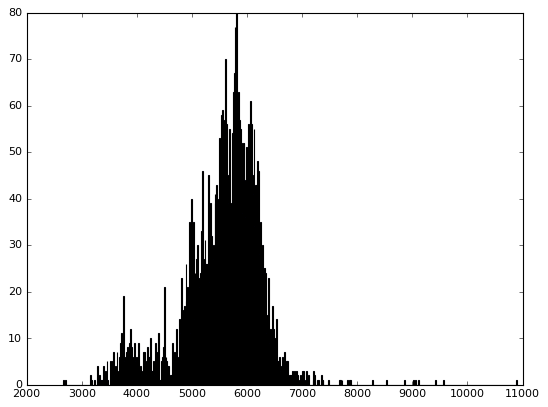

koi_steff
---------
       --
       --
       --
       --
       --
       --
       --
       --
       --
       --
      ...
       --
       --
       --
       --
       --
       --
       --
       --
       --
       --
       --
Length = 63 rows
rowid  kepid   kepoi_name  kepler_name  ... dist_err1 dist_err2 nconfp nkoi
----- -------- ---------- ------------- ... --------- --------- ------ ----
    1 10797460  K00752.01  Kepler-227 b ...    131.26     83.53      2    2
    2 10797460  K00752.02  Kepler-227 c ...    131.26     83.53      2    2
    5 10854555  K00755.01  Kepler-664 b ...    514.88    205.95      1    1
    6 10872983  K00756.01  Kepler-228 d ...     516.6     184.5      3    3
    7 10872983  K00756.02  Kepler-228 c ...     516.6     184.5      3    3
    8 10872983  K00756.03  Kepler-228 b ...     516.6     184.5      3    3
   10 10910878  K00757.01  Kepler-229 c ...     54.25     88.15      3    3
   11 11446443  K00001.01    Kepler-1 b ...      9.76      

In [6]:
fig = plt.figure(figsize=(8,6))
plt.hist(kep['koi_steff'],bins=500)
plt.show()

badmask = (kep['koi_steff'] <= 1000) | (kep['koi_srad'] >= 15000.)
print kep['koi_steff'][badmask]

kep = kep[~badmask]
print kep

In [7]:
x = "x"
print type(x)

for rowIdx in range(0,1):
    rowstr = ""
    for colIdx in range(0,len(kep.colnames)):
        print kep[kep.colnames[colIdx]][rowIdx]
        print type(kep[kep.colnames[colIdx]][rowIdx])
        
        if isinstance(kep[kep.colnames[colIdx]][rowIdx], str) or isinstance(kep[kep.colnames[colIdx]][rowIdx], np.ma.core.MaskedConstant):
            rowstr = rowstr+'"'+str(kep.colnames[colIdx])+'"'+':"{0}"'.format(kep[kep.colnames[colIdx]][rowIdx]) + ", "
        else:
            rowstr = rowstr+'"'+str(kep.colnames[colIdx])+'"'+':{0}'.format(kep[kep.colnames[colIdx]][rowIdx]) + ", "
    rowstr = rowstr[:-2]
    rowstr = "{" + rowstr + ", theta:0},\n"
    print rowstr

<type 'str'>
1
<type 'numpy.int64'>
10797460
<type 'numpy.int64'>
K00752.01
<type 'numpy.string_'>
Kepler-227 b
<type 'numpy.string_'>
CONFIRMED
<type 'numpy.string_'>
9.48803557
<type 'numpy.float64'>
2.775e-05
<type 'numpy.float64'>
-2.775e-05
<type 'numpy.float64'>
170.53875
<type 'numpy.float64'>
0.00216
<type 'numpy.float64'>
-0.00216
<type 'numpy.float64'>
2455003.539
<type 'numpy.float64'>
0.00216
<type 'numpy.float64'>
-0.00216
<type 'numpy.float64'>
0
<type 'numpy.int64'>
--
<class 'numpy.ma.core.MaskedConstant'>
--
<class 'numpy.ma.core.MaskedConstant'>
--
<class 'numpy.ma.core.MaskedConstant'>
--
<class 'numpy.ma.core.MaskedConstant'>
--
<class 'numpy.ma.core.MaskedConstant'>
0.146
<type 'numpy.float64'>
0.318
<type 'numpy.float64'>
-0.146
<type 'numpy.float64'>
2.9575
<type 'numpy.float64'>
0.0819
<type 'numpy.float64'>
-0.0819
<type 'numpy.float64'>
--
<class 'numpy.ma.core.MaskedConstant'>
--
<class 'numpy.ma.core.MaskedConstant'>
--
<class 'numpy.ma.core.MaskedConstant'>

In [8]:
with open("./KOIarchive_stellar.js","a") as outfile:
    outfile.write ("var keplerstars = [\n")
    for rowIdx in range(0,len(kep)):
        if (kep['koi_srad'][rowIdx] >= 0.005) and (kep['koi_srad'][rowIdx] <= 20.) and (kep['koi_steff'][rowIdx] >= 500) and (kep['koi_steff'][rowIdx] <= 15000.):
            rowstr = ""
            for colIdx in range(0,len(kep.colnames)):
                if isinstance(kep[kep.colnames[colIdx]][rowIdx], str) or isinstance(kep[kep.colnames[colIdx]][rowIdx], np.ma.core.MaskedConstant):
                    rowstr = rowstr+'"'+str(kep.colnames[colIdx])+'"'+':"{0}"'.format(kep[kep.colnames[colIdx]][rowIdx]) + ", "
                else:
                    rowstr = rowstr+'"'+str(kep.colnames[colIdx])+'"'+':{0}'.format(kep[kep.colnames[colIdx]][rowIdx]) + ", "
            rowstr = rowstr[:-2]
            rowstr = "{" + rowstr + ', "theta":0},\n'
            outfile.write(rowstr)
    outfile.write("];")
    outfile.close()

In [6]:
def convertL(inputRA, inputdec):
    Lnaught = 122.93*(np.pi/180.)
    Anaught = 192.86*(np.pi/180.)
    Dnaught = 27.13*(np.pi/180.)
                    
    inputRA_radians = inputRA*(np.pi/180.)
    inputdec_radians = inputdec*(np.pi/180.)


    L =  (Lnaught - np.arctan2(((np.cos(inputdec_radians)) * (np.sin(inputRA_radians - Anaught))), 
        ((np.sin(inputdec_radians)) * (np.cos(Dnaught))) - ((np.cos(inputdec_radians)) * 
        (np.sin(Dnaught)) * (np.cos(inputRA_radians - Anaught)))))

    return L*(180./np.pi);

def convertB(inputRA, inputdec):
    Anaught = 192.86*(np.pi/180.)
    Dnaught = 27.13*(np.pi/180.)
    inputRA_radians = inputRA*(np.pi/180.)
    inputdec_radians = inputdec*(np.pi/180.)

    B =  (np.arcsin(((np.sin(inputdec_radians))*(np.sin(Dnaught)))+((np.cos(inputdec_radians))*(np.cos(Dnaught))*(np.cos(inputRA_radians-Anaught)))))
                   
    return B*(180./np.pi);

def convertXYZ(distance, xyzinputRA, xyzinputdec):
    l = convertL(inputRA=xyzinputRA, inputdec=xyzinputdec)
    b = convertB(inputRA=xyzinputRA, inputdec=xyzinputdec)

    l=l*(np.pi/180.);

    b=b*(np.pi/180.);

    x = distance * (np.cos(l)) * (np.cos(b));
    y = distance*(np.cos(b))*(np.sin(l));
    z = distance * (np.sin(b));
    
    return x, y, z

In [7]:
xs, ys, zs = convertXYZ(kep['dist'],kep['ra'],kep['dec'])

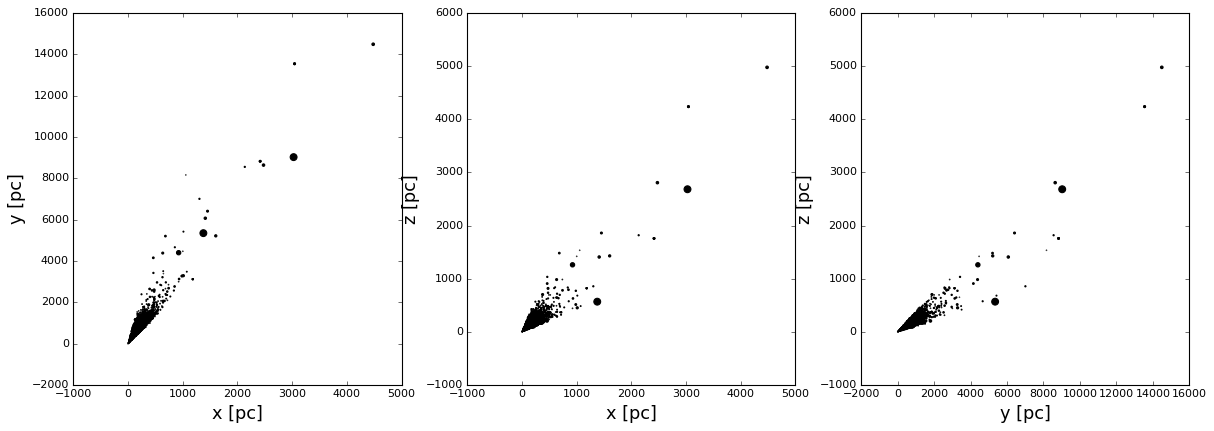

In [15]:
fig, axes = plt.subplots(1,3,figsize=(18,6))

axes[0].scatter(xs,ys,s=kep['koi_srad'],color='k',marker='.')
axes[1].scatter(xs,zs,s=kep['koi_srad'],color='k',marker='.')
axes[2].scatter(ys,zs,s=kep['koi_srad'],color='k',marker='.')

axes[0].set_xlabel("x [pc]",fontsize=16)
axes[0].set_ylabel("y [pc]",fontsize=16)

axes[1].set_xlabel("x [pc]",fontsize=16)
axes[1].set_ylabel("z [pc]",fontsize=16)

axes[2].set_xlabel("y [pc]",fontsize=16)
axes[2].set_ylabel("z [pc]",fontsize=16)

#for ax in axes:
#    ax.set_xlim(0,2000)
#    ax.set_ylim(0,2000)
plt.show()

In [14]:
print np.min(xs)
print np.max(xs)

print np.min(ys)
print np.max(ys)

print np.min(zs)
print np.max(zs)

0.0
4480.48934867
0.0
14487.6009198
0.0
4977.42390405


In [6]:
bsc = ascii.read("./bsc5catalog.txt")
print bsc

number RA[deg]   dec[deg]  Vmagnitude
------ -------- ---------- ----------
     0  1.29125  45.229167        6.7
     1 1.265833   0.503056       6.29
     2  1.33375    -4.2925       4.61
     3    1.425  13.396111       5.51
     4 1.566667  58.436667       5.96
     5 1.579167    -48.925        5.7
     6 1.610417  64.196111       5.59
     7 1.653333  29.021389       6.13
     8  1.70875   -22.8925       6.18
     9 1.825833 -16.613611       6.19
   ...      ...        ...        ...
  9085 1.056667  62.287778       5.88
  9086 1.082083 -15.471111       5.78
  9087 1.084583 -28.731389        6.4
  9088 1.125417  -9.490556       4.94
  9089    1.175  67.166667       5.67
  9090 1.152917  42.092222       6.01
  9091 1.127917 -71.102222       7.31
  9092 1.224167  34.659722       6.12
  9093 1.172083 -70.563056       5.59
  9094 1.233333  26.648889       6.25
  9095 1.275833  61.314167        5.8
Length = 9096 rows


In [5]:
for rowIdx in range(0,1):
    rowstr = ""
    for colIdx in range(0,len(bsc.colnames)):
        rowstr = rowstr+'"'+str(bsc.colnames[colIdx])+'"'+':{0}'.format(bsc[bsc.colnames[colIdx]][rowIdx]) + ", "
    rowstr = rowstr[:-2]
    rowstr = "{" + rowstr + "},\n"
    print rowstr

{"number":0, "RA[deg]":1.29125, "dec[deg]":45.229167, "Vmagnitude":6.7},



In [ ]:
with open("./bsc.js","a") as outfile:
    outfile.write ("var brightstars = [\n")
    for rowIdx in range(0,len(bsc)):
        rowstr = ""
        for colIdx in range(0,len(bsc.colnames)):
            rowstr = rowstr+'"'+str(bsc.colnames[colIdx])+'"'+':{0}'.format(bsc[bsc.colnames[colIdx]][rowIdx]) + ", "
        rowstr = rowstr[:-2]
        rowstr = "{" + rowstr + "},\n"
        outfile.write(rowstr)
    outfile.write("];")
    outfile.close()

In [7]:
bscfile = "./keplerAtlasNB/js/bsc.js"

with open(bscfile, 'r') as f:
    bsc = json.load(f)

In [11]:
bsc = bsc['brightstars']
print type(bsc)

<type 'list'>


In [14]:
dists = []
for idx, i in enumerate(bsc):
    dists.append(i['dist'])

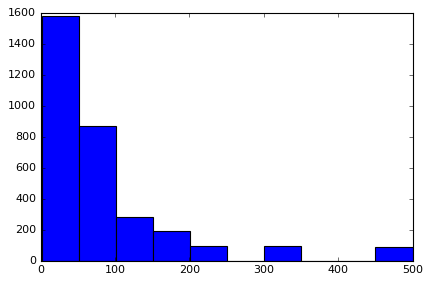

In [19]:
dists = np.array(dists)

plt.hist(dists[dists < 600])
plt.show()

In [21]:
print np.mean(np.array(dists))

106.147283088
